<a href="https://colab.research.google.com/github/andhitogalih/MachineLearning-2023/blob/main/Minggu3_Mechine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Job Sheet 3 : Regresion**

Nama : Andhito Galih Nur Cahyo

Kelas : TI-3D

No Absen : 07

Nim : 214720138


# **Praktikum 1**

# Langkah 1: Persiapan Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

# Langkah 2: Import Library

In [ ]:
# import package
import numpy as np
import pandas as pd

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

# Langkah 3: Baca Data

In [ ]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/Mesin Learning/Pertemuan 3/dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Baca data dari file CSV dengan menggunakan Pandas.

# Langkah 4: Pemahaman Terhadap Data

In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

# Langkah 5: Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import library Matplotlib dan Seaborn untuk visualisasi data.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


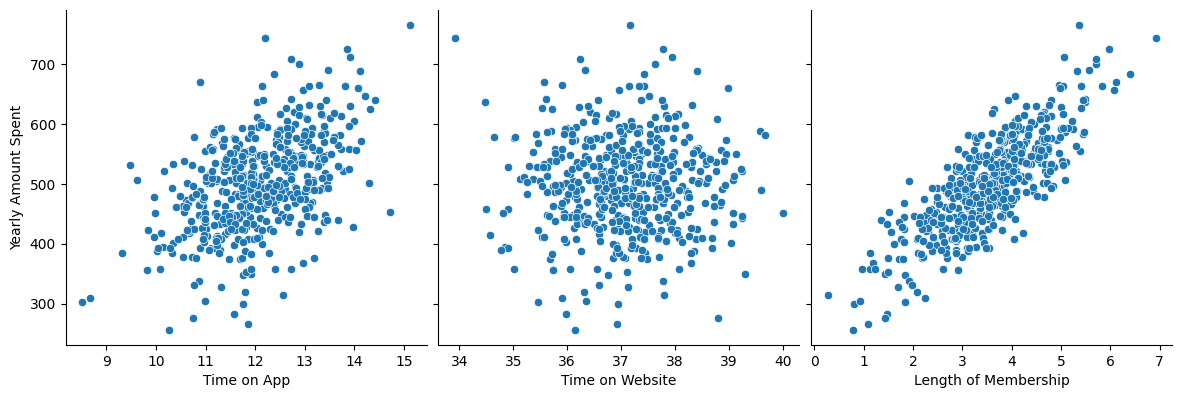

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Time on App', 'Time on Website','Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

<ipython-input-9-7d3c3461879a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)


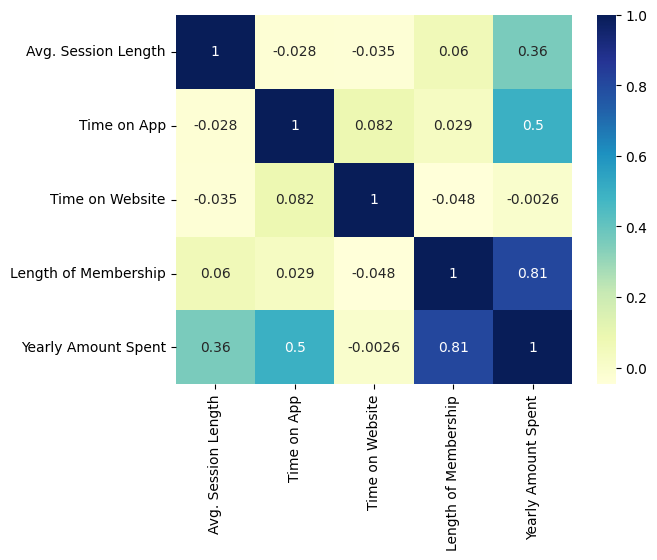

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin terang warna, semakin tinggi korelasinya.

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

# Langkah 6: Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

X.head()

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64

Pisahkan variabel bebas (X) dan variabel target (y).

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)


Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

In [ ]:
# hasil training dtaset
X_train
y_train

153    657.019924
84     533.514935
310    479.614812
494    510.661792
126    516.831557
          ...    
343    576.025244
359    561.874658
323    473.360496
280    511.979860
8      570.200409
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                   265.248299
Length of Membership     66.301522
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Tue, 12 Sep 2023   Prob (F-statistic):           1.59e-85
Time:                         05:21:57   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.2483      9.120     29.083      0.000     247.311     283.186
Length of Membership    66.3015      2.501     26.512      0.000      61.383      71.220
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.471
Skew:                          -0.013   Prob(JB):                        0.479
Kurtosis:                       2.683   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

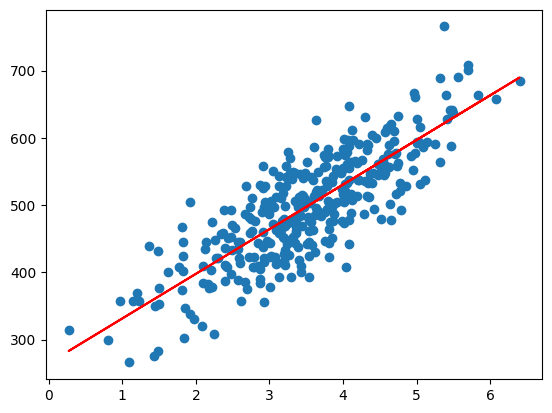

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Visualisasikan garis regresi pada data latih.

# Langkah 7: Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

<ipython-input-18-a6ce713c550f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


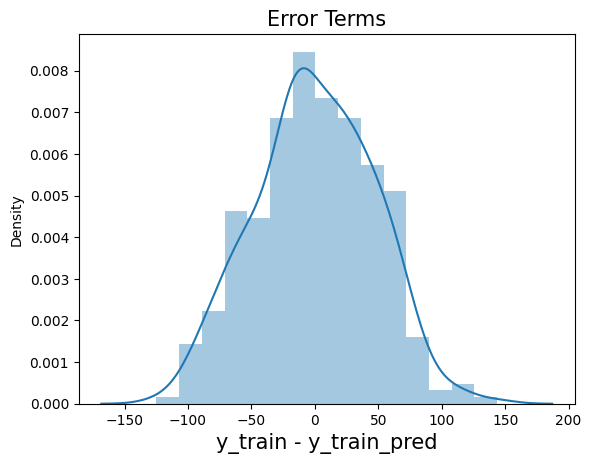

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

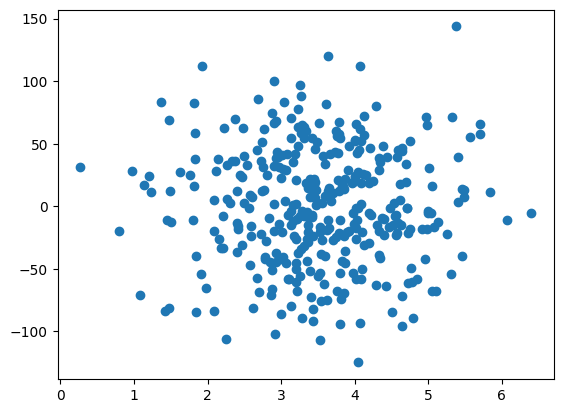

In [ ]:
plt.scatter(X_train,res)
plt.show()

# Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

69     500.794385
29     579.688406
471    533.188991
344    446.066436
54     455.838449
dtype: float64

Lakukan prediksi pada data uji.

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.611948913768747

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

# Langkah 9: Visualisasi Hasil

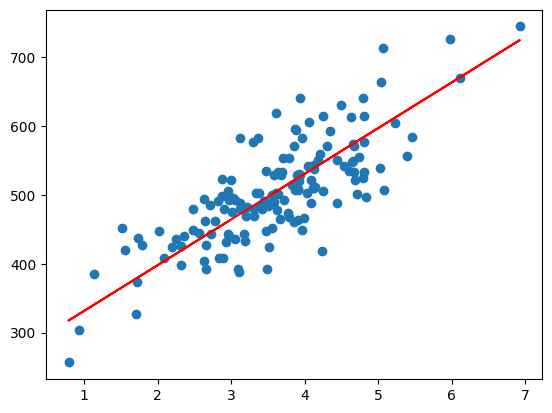

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

# **Praktikum 2**

# 1. Mengimpor Library:

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Mengimpor Dataset:

Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Mesin Learning/Pertemuan 3/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# 4. Fitting SVR ke Dataset:

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# 5. Visualisasi Hasil SVR:

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

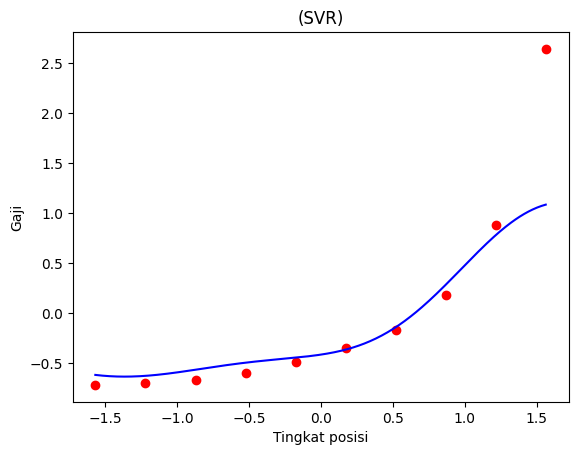

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

# 6. Prediksi Hasil:

Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

Menskalakan fitur prediksi menggunakan sc_X.transform.

Melakukan prediksi menggunakan model SVR yang telah dilatih.

Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


# 7. Menampilkan Hasil:

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


# 8. Validasi Hasil:

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]

Hasil output Gambar 3.10 adalah grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.

**Grafik SVR:**


*   Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model.
*   Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.


Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar $170,370.02. Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar $170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan.

Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai tingkat_posisi_prediksi.

# 9. Evaluasi Model SVR

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Tugas Praktikum**

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
* Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Pengumpulan Tugas**

Tugas praktikum ini dikumpulkan dalam bentuk laporan berformat dokumen (.doc) dan kode program Python yang digunakan (dalam format .py atau .ipynb). Tugas dikumpulkan ke dosen pengampu sesuai dengan jadwal yang telah ditentukan.

Selamat mengerjakan tugas praktikum! Jika Anda mengalami kesulitan, jangan ragu untuk berkonsultasi dengan dosen pengampu

# **Langkah 1 - Identifikasi Variable Bebas (Fitur)**

Dataset ini berisi informasi biaya medis pribadi pasien, termasuk variabel-variabel berikut:

* age: Usia pasien.
* sex: Jenis kelamin pasien (pria/wanita).
* bmi: Indeks massa tubuh (BMI) pasien.
* children: Jumlah anak/anak-anak dalam polis asuransi.
* smoker: Status perokok pasien (ya/tidak).
* region: Wilayah geografis pasien.
* charges: Biaya medis pribadi yang dikeluarkan oleh pasien.

Variable Bebas age, bmi, dan children

* **Age (Usia)**: Usia pasien dapat memiliki pengaruh signifikan terhadap biaya medis. Biasanya, biaya medis cenderung meningkat seiring bertambahnya usia karena risiko penyakit kronis dan perawatan medis yang lebih tinggi pada orang yang lebih tua.
* **BMI (Indeks Massa Tubuh)**: BMI tinggi atau rendah dapat mengindikasikan masalah kesehatan, dan ini dapat memengaruhi biaya medis. Orang dengan BMI tinggi cenderung memiliki biaya medis yang lebih tinggi karena masalah kesehatan terkait obesitas.
* **Children (Jumlah Anak)**: Jumlah anak dalam polis asuransi juga dapat memengaruhi biaya medis pribadi. Pasangan yang memiliki lebih banyak anak mungkin akan membayar biaya medis tambahan untuk anak-anak mereka dalam polis asuransi.



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# **Langkah 2 - Persiapan Data**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/Mesin Learning/Pertemuan 3/insurance.csv')


# **Langkah 3 - Pemahaman Terhadap Data**

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Langkah 4 - Visualisasi Data**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


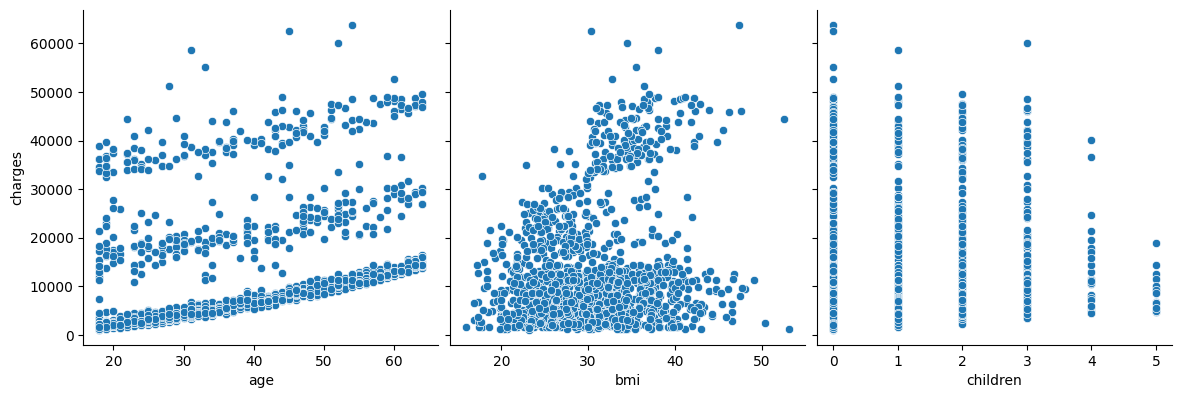

<ipython-input-22-fdd855ff8bb3>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


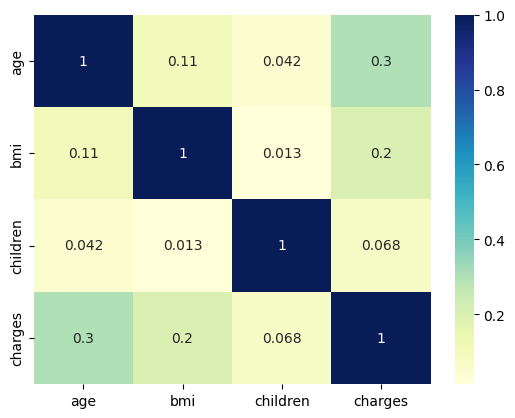

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# **Langkah 5 - Membuat Model Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Identifikasi variabel bebas (fitur) dan variabel target
X = data[['age', 'bmi', 'children']]
y = data['charges']

# Bagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (jika diperlukan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model MLR
mlr_model = LinearRegression()

# Melatih model pada data latih
mlr_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = mlr_model.predict(X_test_scaled)


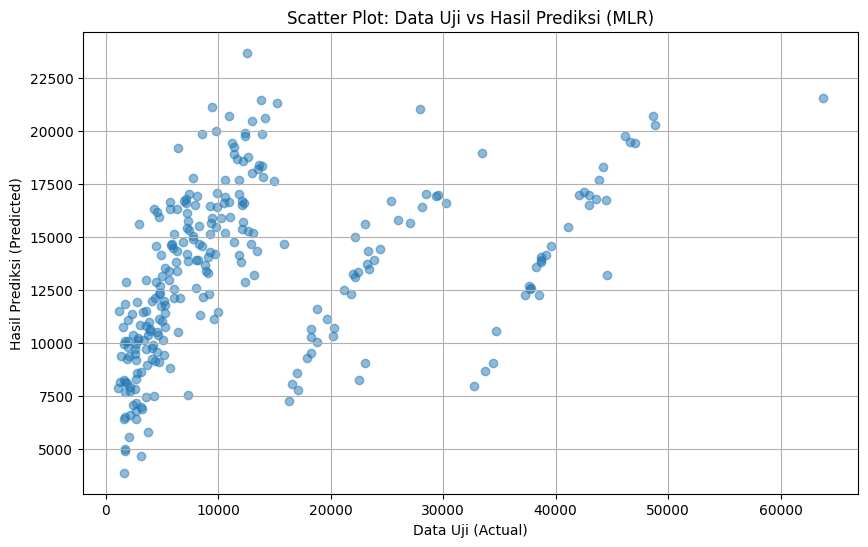

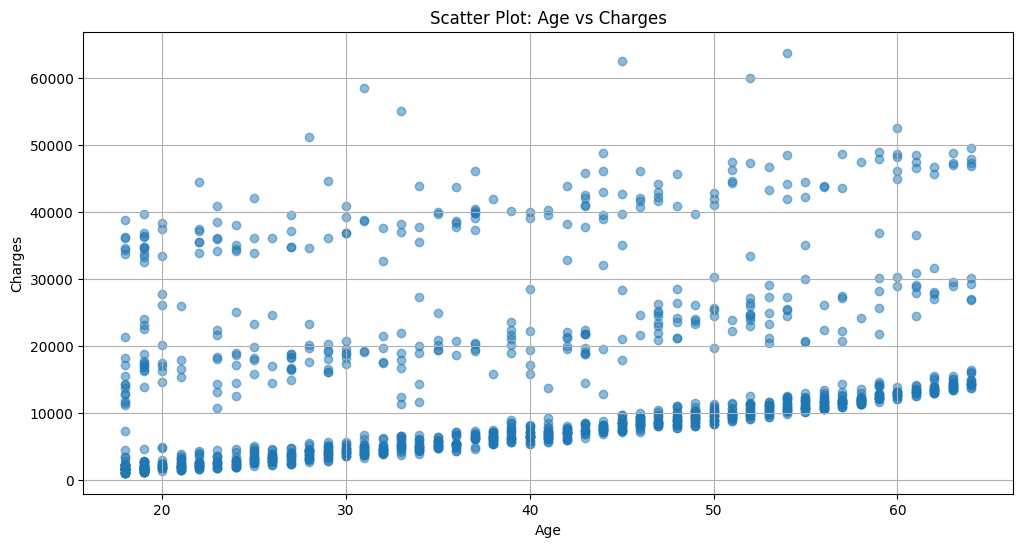

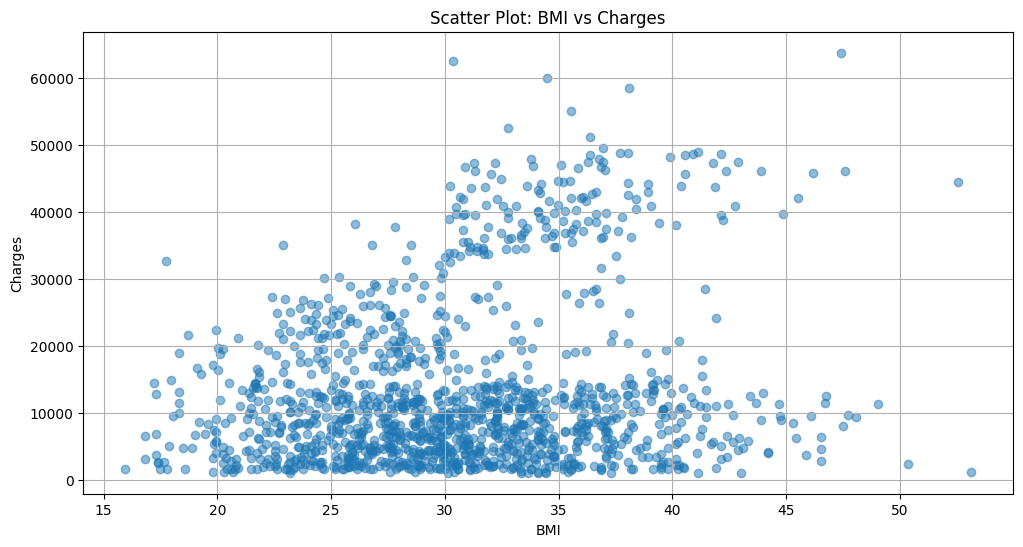

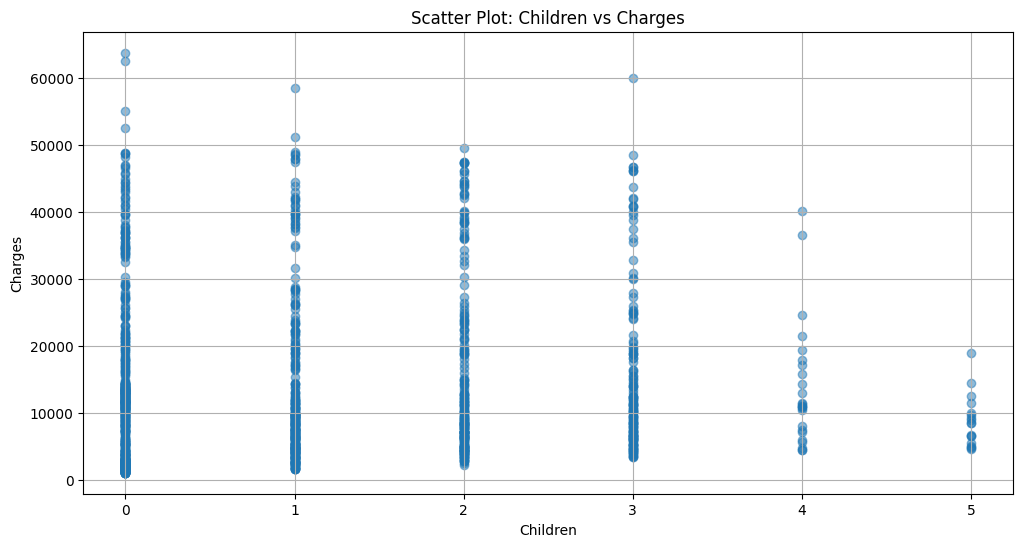

R-squared: 0.15489592484270753
MSE: 131201335.64669806
MAE: 9181.311632897381


In [ ]:
# Menghitung R-squared
r_squared = r2_score(y_test, y_pred)

# Menampilkan hasil prediksi dan nilai target
# Scatter plot data uji vs hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Scatter Plot: Data Uji vs Hasil Prediksi (MLR)')
plt.xlabel('Data Uji (Actual)')
plt.ylabel('Hasil Prediksi (Predicted)')
plt.grid(True)
plt.show()

# Scatter plot untuk hubungan antara 'age' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.title('Scatter Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter plot untuk hubungan antara 'bmi' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(data['bmi'], data['charges'], alpha=0.5)
plt.title('Scatter Plot: BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Scatter plot untuk hubungan antara 'children' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(data['children'], data['charges'], alpha=0.5)
plt.title('Scatter Plot: Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print("R-squared:", r_squared)
print("MSE:", mse)
print("MAE:", mae)

# **Langkah 6 - Menerapkan Support Vector Regression (SVR)**

R-squared (SVR): -0.07266581556390928
MSE (SVR): 166530007.18088558
MAE (SVR): 8600.875069585998


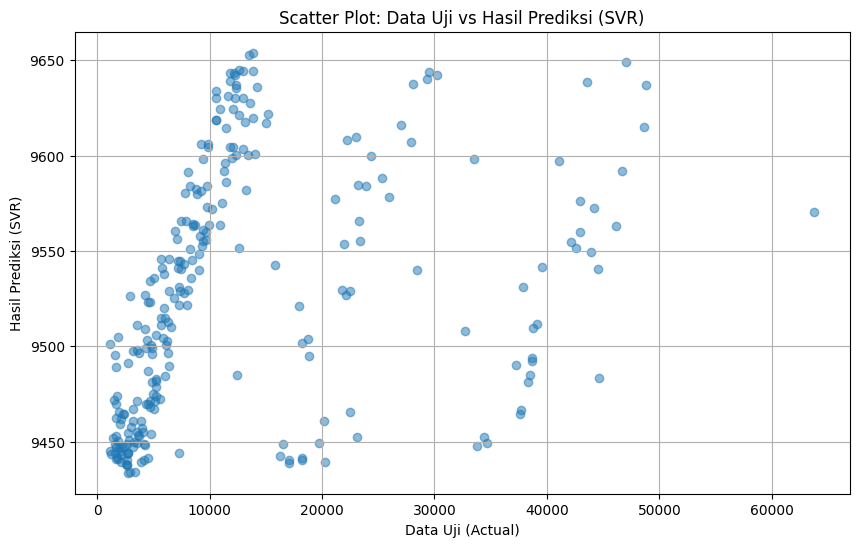

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVR dengan kernel RBF
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Melatih model SVR pada data latih
svr_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred_svr = svr_model.predict(X_test_scaled)

# Menghitung R-squared
r_squared_svr = r2_score(y_test, y_pred_svr)

# Menghitung MSE
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Menghitung MAE
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Menampilkan hasil evaluasi
print("R-squared (SVR):", r_squared_svr)
print("MSE (SVR):", mse_svr)
print("MAE (SVR):", mae_svr)

# Scatter plot data uji vs hasil prediksi SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('Scatter Plot: Data Uji vs Hasil Prediksi (SVR)')
plt.xlabel('Data Uji (Actual)')
plt.ylabel('Hasil Prediksi (SVR)')
plt.grid(True)
plt.show()